## Assignment 9
----

### Imports

In [30]:
import numpy as np
import matplotlib.pyplot as plt

### Functions / Classes
-----

In [35]:
def model_function(H_l, r_w = 0.15, r=3600, T_u = 80000, H_u = 1000, T_l=80, L=1200, K_w = 11000):

    enum = 2*np.pi*T_u*(H_u-H_l)
    ln = np.log(r/r_w)
    denom = ln*(1+2*L*T_u/(ln*r_w**2*K_w)+T_u/T_l)

    return enum/denom

def prop_dist(u, S):
    return np.random.normal(u, S)

def MCMC(M, a, data, start=500, ret_all = False):
    # variance
    Kq = a

    # start poss
    u_curr = start

    # list for samples
    samples = [u_curr]
    # list for MCMC progression -> only when ret_all is True
    MCMC_prog = []

    # step count
    N = 1

    # accepted sample count
    N_samples = 1

    # calculate prev_ration for the starting position
    prev_postertior = -1/(2*10**4)*(500 - start)**2
    temp = 0
    model_val = model_function(start)
    for di in data:
        temp += (di-model_val)**2
    prev_postertior+= -1/800*temp

    while N_samples < M:
        # new proposal point
        prop = prop_dist(u_curr, Kq)

        # log of posterior distribution
        postertior = -1/(2*10**4)*(500- prop)**2
        temp = 0
        model_val = model_function(prop)
        for di in data:
            temp += (di-model_val)**2
        postertior += -1/800*temp

        # log of accept prob
        accept_prob = min(0, postertior-prev_postertior)

        # see if we accept new point
        if np.log(np.random.rand()) < accept_prob:
            # add new sample point
            samples.append(prop)
            # change current state of MC
            u_curr = prop
            prev_postertior = postertior
            N_samples += 1

        if ret_all:
            MCMC_prog.append(u_curr)
        N += 1

    if ret_all:
        return samples, N, MCMC_prog,
        
    return samples, N,

### Results
----

In [36]:
data = [149, 161, 177, 158, 132, 185]
M = 10**5
sample, N, prog = MCMC(M, 60, data, ret_all=True)

print('Estimated accept prob', M/N)

Estimated accept prob 0.2544063174176741


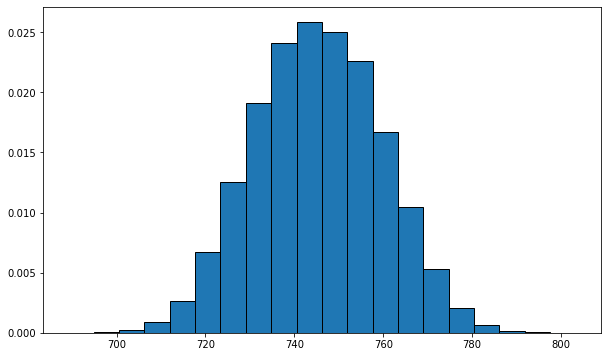

In [34]:
plt.figure(figsize=(10,6))
plt.hist(sample[100:], density=True, edgecolor='black', bins=20);

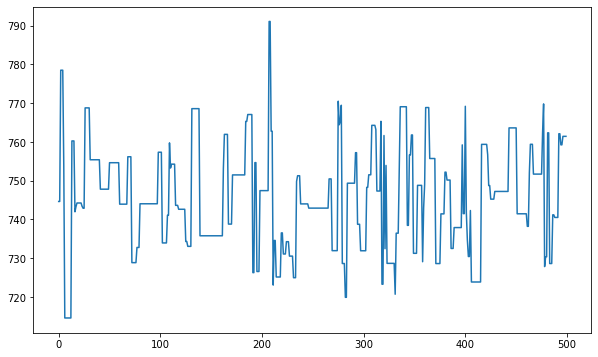

In [38]:
# plot for the progression of the MCMC chain
plt.figure(figsize=(10,6))
plt.plot(prog[2500:3000]);